<a href="https://colab.research.google.com/github/alialthiab/Data-Analysis/blob/master/HIAST_DA_2022_Q1(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Loading

In [1]:
library("readxl")


In [2]:
cars <- read_excel("/content/cars.xlsx")
rownames(cars) <- cars$Type
head(cars)

Warning message:
“Setting row names on a tibble is deprecated.”


Type,Cyl,Puis,Lon,Lar,Poids,Vitesse,Prix
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alfasud,1350,79,393,161,870,165,30570
Audi,1588,85,468,177,1110,160,39990
Simca,1294,68,424,168,1050,152,29600
Citroen,1222,59,412,161,930,151,28250
Fiat,1585,98,439,164,1105,165,34900
Lancia,1297,82,429,169,1080,160,35480


In [13]:
summary(cars)

     Type                Cyl            Puis             Lon       
 Length:18          Min.   :1166   Min.   : 55.00   Min.   :393.0  
 Class :character   1st Qu.:1310   1st Qu.: 70.75   1st Qu.:424.0  
 Mode  :character   Median :1578   Median : 82.00   Median :434.5  
                    Mean   :1632   Mean   : 84.61   Mean   :433.5  
                    3rd Qu.:1798   3rd Qu.: 98.00   3rd Qu.:448.0  
                    Max.   :2664   Max.   :128.00   Max.   :469.0  
      Lar            Poids         Vitesse            Prix      
 Min.   :157.0   Min.   : 815   Min.   : 140.0   Min.   :22100  
 1st Qu.:162.2   1st Qu.:1020   1st Qu.: 152.5   1st Qu.:29842  
 Median :167.0   Median :1088   Median : 160.0   Median :33145  
 Mean   :166.7   Mean   :1081   Mean   : 228.3   Mean   :34120  
 3rd Qu.:169.8   3rd Qu.:1127   3rd Qu.: 166.5   3rd Qu.:38458  
 Max.   :177.0   Max.   :1370   Max.   :1401.0   Max.   :47700  

## 1.Correlation Matrix

In [3]:
cars.cor = cor(cars[c(2:7)])
cars.cor

,Cyl,Puis,Lon,Lar,Poids,Vitesse
Cyl,1.0000000,0.7966277,0.7014619,0.6297572,0.7838254,-0.2011450
Puis,0.7966277,1.0000000,0.6413624,0.5208320,0.7613774,-0.1714686
Lon,0.7014619,0.6413624,1.0000000,0.8492664,0.8565159,-0.3182343
Lar,0.6297572,0.5208320,0.8492664,1.0000000,0.7079342,-0.2504894
Poids,0.7838254,0.7613774,0.8565159,0.7079342,1.0000000,-0.1422991
Vitesse,-0.2011450,-0.1714686,-0.3182343,-0.2504894,-0.1422991,1.0000000


## 2.Visualization

### Correlogram

In [4]:
install.packages("corrplot")
library(corrplot)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



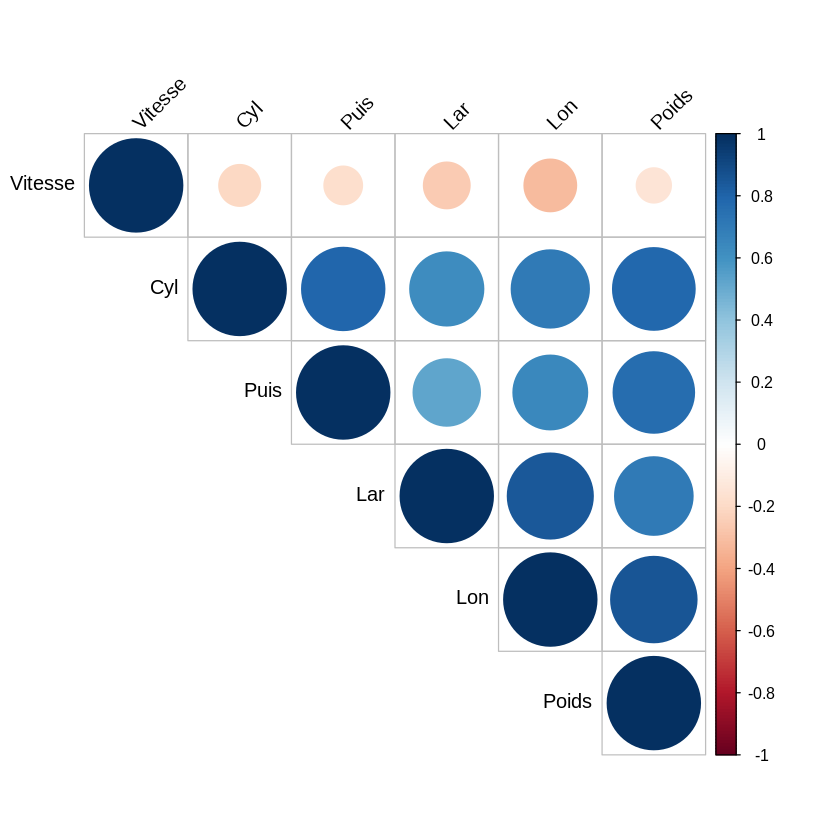

In [5]:
corrplot(cars.cor, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

### Heatmap

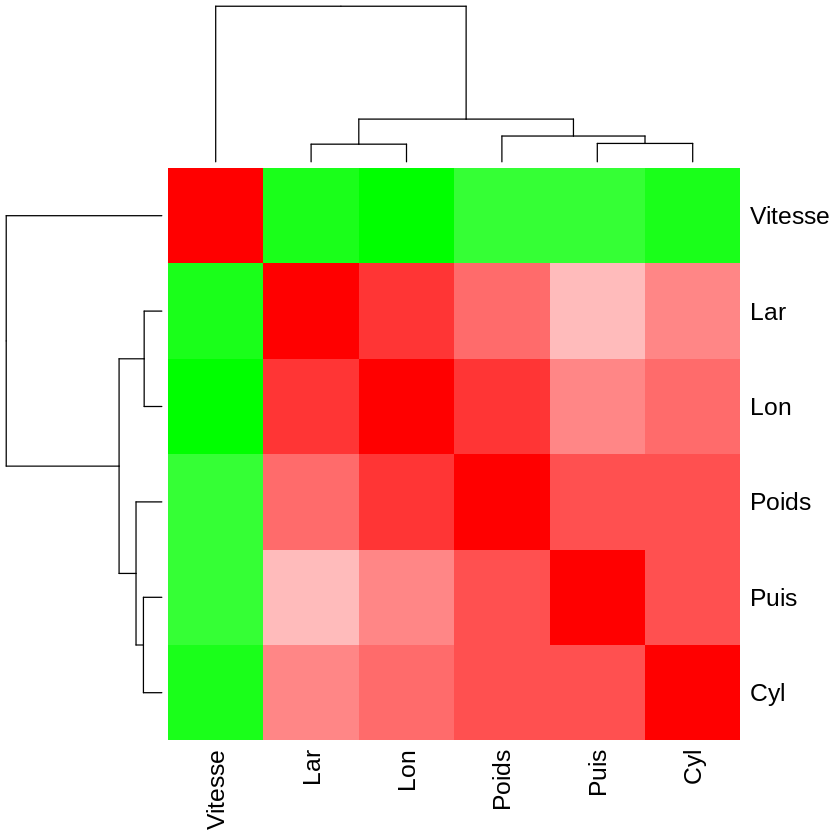

In [6]:
palette = colorRampPalette(c("green", "white", "red")) (20)
heatmap(x = cars.cor, col = palette, symm = TRUE)

### Correlation Chart

In [7]:
install.packages("PerformanceAnalytics")
library("PerformanceAnalytics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘quadprog’, ‘zoo’


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend




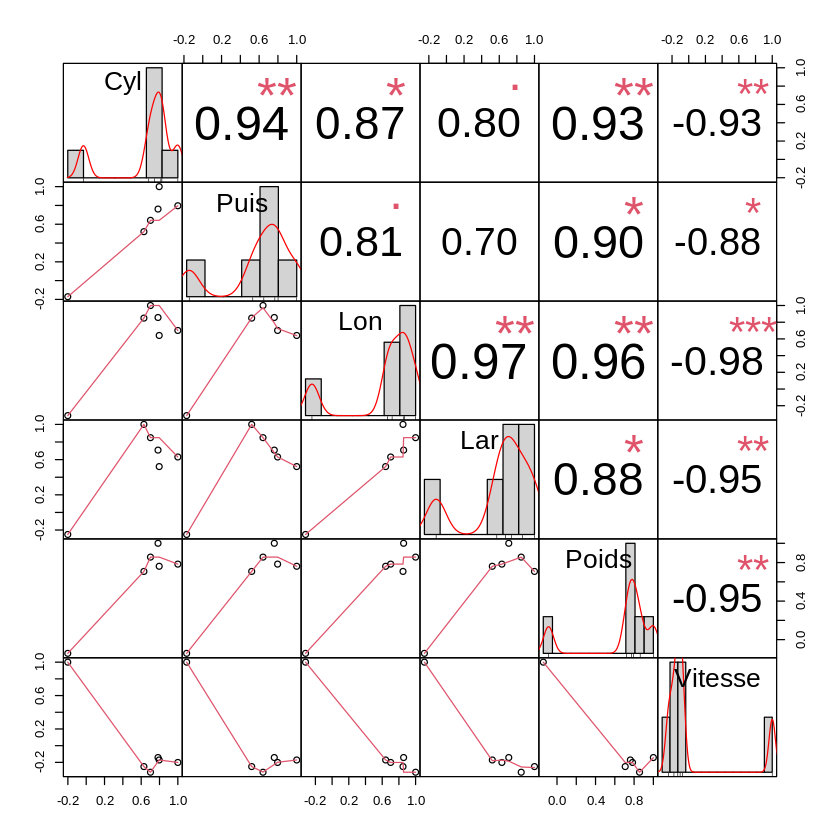

In [8]:
chart.Correlation(cars.cor, histogram=TRUE, pch=19)

The distribution of each variable is shown on the diagonal.



1.   On the bottom of the diagonal : the bivariate scatter plots with a fitted line are displayed.
2.   On the top of the diagonal : the value of the correlation plus the significance level as stars
3. Each significance level is associated to a symbol : p-values(0, 0.001, 0.01, 0.05, 0.1, 1) <=> symbols(“***”, “**”, “*”, “.”, " “)






**We notice that variables (Lar, Poids) form about 88% of data**

Eigen Values

In [15]:
# 2. Calculate eigenvectors/eigenvalues
cars.eig <- eigen(cars.cor)
cars.eig

eigen() decomposition
$values
[1] 3.98559656 0.95717212 0.57510152 0.22300317 0.17973869 0.07938795

$vectors
           [,1]        [,2]        [,3]        [,4]        [,5]        [,6]
[1,] -0.4411768  0.13690655  0.35312480  0.62760760 -0.50393375  0.11866757
[2,] -0.4177022  0.18609882  0.57098118 -0.13105223  0.66664004  0.05734925
[3,] -0.4628465 -0.08075285 -0.35575585 -0.31823121 -0.08874353  0.73725390
[4,] -0.4207148 -0.07387319 -0.60562608  0.43638750  0.38983902 -0.32916618
[5,] -0.4625313  0.17881310 -0.02706705 -0.54337745 -0.37488852 -0.56352252
[6,]  0.1603898  0.95009022 -0.23495864  0.04438245  0.03536321  0.11479437


## 3.Correlation Circle

In [9]:
install.packages('FactoMineR')
install.packages("factoextra")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggrepel’


Warning message in install.packages("FactoMineR"):
“installation of package ‘nloptr’ had non-zero exit status”
Warning message in install.packages("FactoMineR"):
“installation of package ‘lme4’ had non-zero exit status”
Warning message in install.packages("FactoMineR"):
“installation of package ‘pbkrtest’ had non-zero exit status”
Warning message in install.packages("FactoMineR"):
“installation of package ‘car’ had non-zero exit status”
Warning message in install.packages("FactoMineR"):
“installation of package ‘FactoMineR’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-lib

In [10]:
library("FactoMineR")
library("factoextra")

ERROR: ignored

In [ ]:
library("FactoMineR")


In [ ]:
PCA(X, scale.unit = TRUE, ncp = 5, graph = TRUE)
